# Projekt nr 1

W ramach projektu nr 1 przygotujemy program obliczający parametry ruchu skoczka bungee, skaczącego z podnośnika koszowego, znajdującego się na wysokości $h$ ponad poziomem terenu. Początek dwuwymiarowego kartezjańskiego układu współrzędnych, $(0,0)$ został umieszczony w miejscu zamocowania liny do kosza podnośnika (zobacz rysunek poniżej). Skoczek został uproszczony do punktu o masie $m$, a jego pozycja początkowa opisana jest współrzędnymi $(x_s, y_s)$.

Podczas lotu skoczka zakładamy, że na skoczka działa siła grawitacji, $\vec{G}$, siła sprężystości liny wywołana jej wydłużeniem, $\vec{S}$, a także siła oporów ruchu, $\vec{O}$. Pominiemy natomiast wpływ wiatru oraz założymy sztywny podnośnik.

<div> <img src="dzwig.png" alt="Drawing" style="width: 400px;"/></div> 

Ponieważ w tym projekcie będziemy pracowali z macierzami i wektorami, zaimportujmy bibliotekę `numpy`. Dodatkowo, zaimportujemy bibliotekę `matplotlib.pyplot` w celu wizualizacji wyników.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Na początek zdefiniujemy kilka stałych. Przyjmijmy, że wysokość kosza nad terenem to $h = 30 \ \textrm{m}$, masa skoczka to $m = 80 \ \textrm{kg}$. Początkowa pozycja skocza to $1 \ \textrm{m}$ na lewo od punktu mocowania liny, tj. $x_s = -1$ oraz $y_s = 0$. 

In [2]:
h = 30      # wysokość dźwigu [m]
m = 80      # masa skoczka [kg]
xs, ys = -1, 0     # współrzędne x i y początkowej pozycji skoczka

Aby obliczyć wartość siły grawitacji, $\vec{G}$, zdefiniujmy przyspieszenie grawitacyjne $g = 9.81 \ \textrm{m}/\textrm{s}^2$. Siła $\vec{G}$ jest iloczynem masy skoczka oraz przyspieszenia grawitacyjnego.

In [3]:
g = 9.81     # przyspieszenie grawitacyjne [m/s^2]

Siłę sprężystości liny, $\vec{S}$ możemy w uproszczeniu wyrazić jako iloczyn sztywności liny oraz jej wydłużenia. Schemat działania liny bungee można uprościć do działania sprężyny, której sztywność maleje wraz z wydłużeniem. W związku z tym zastosujemy uproszczony model, gdzie sztywność liny będzie wynosiła $k_1$ dla wydłużenia mniejszego od $e_b$, a następnie $k_2$ dla wydłużenia większego od $e_b$, gdzie $k_1 > k_2$.

Przyjmijmy linę bungee o długości początkowej $L = 10 \ \textrm{m}$ i parametrach $k_1 = 200 \ \textrm{N}/\textrm{m}$, $k_2 = 110 \ \textrm{N}/\textrm{m}$ oraz $e_b = 5 \ \textrm{m}$.

In [4]:
k_1 = 200           # sztywność liny dla e < e_b [N/m]
k_2 = 110           # sztywność liny dla e > e_b [N/m]
e_b = 5             # wydłużenie przy którym zmienia się sztywność [m]
k = [k_1, k_2]
L = 10              # długość początkowa liny [m]

W naszym uproszczonym modelu przyjmijmy również, że siła oporów ruchu, $\vec{O}$, jest wprost proporcjonalna do kwadratu prędkości skoczka. Aby określić współczynnik proporcjonalności, $d$, potrzebne nam będzie zdefiniowanie dodatkowych parametrów skocza oraz otaczającego go powietrza. Przyjmijmy gęstość powietrza $\rho = 1.2 \ \textrm{kg}/\textrm{m}^3$, współczynnik oporu aerodynamicznego $c_x = 1$ (dla spadochroniarza spadającego na płasko) oraz powierzchnię rzutu ciała skoczka $a_c = 0.8 \textrm{m}^2$. Współczynnik oporu ruchu, $d$, obliczamy wtedy jako iloczyn zdefiniowanych parametrów (współczynnik ten ma jednostkę $\dfrac{\textrm{N}\cdot\textrm{s}^2}{\textrm{m}^2}$).

In [5]:
rho = 1.2       # gęstość powietrza [kg/m^3]
cx = 1.0        # współczynnik oporu aerodynamicznego
ac = 0.8        # powierzchnia rzutu ciała skoczka [m^2]
d = rho*cx*ac   # współczynnik oporu ruchu

Na koniec ustalmy czas trwania symulacji skoku $t_{max} = 30 \ \textrm{s}$ oraz liczbę kroków czasowych, dla których przeprowadzona będzie symulacja skoku, $nt = 100000$.

**UWAGA** Rozwiązanie tego zadania jest rozwiązaniem przybliżonym i zależy bezpośrednio od liczby przyjętych kroków czasowych. Z tego powodu parametr $nt$ powinien być odpowiednio duży, aby rozwiązanie było poprawne.

In [6]:
t_max = 30      # maksymalny czas [s]
nt = int(1e5)   # liczba kroków czasowych

## 1. Inicjalizacja macierzy

Na początku inicjalizujemy tablice (macierze), które będą potrzebne do wykonania symulacji skoku. Innymi słowy, w tym kroku rezerwujemy miejsce w pamięci komputera, aby był on zdolny przechowywać wszystkie wymagane liczby. W związku z tym należy stworzyć tablice (macierze) o odpowiednich wymiarach, w których przechowywane będą wyniki związane z aktualnym czasem, długością liny, pozycją, prędkością oraz przyspieszeniem skoczka, a także siłami działającymi na niego.

**Odpowiednie funkcje piszemy samodzielnie, zgodnie z instrukcją zawartą w komentarzu wewnątrz funkcji.**

**UWAGA** Tworząc wektory czasu, pozycji, długości liny i pozycji należy zwrócić uwagę, aby ich rozmiar wynosił `(nt,)`, zamiast `(nt,1)`. Rozmiar wektora `v` można zweryfikować korzystając z `v.shape`.

In [7]:
def inicjalizacja_czasu(t_max, nt):
    '''
    Cel:
        Funkcja tworzy wektor czasu t oraz określa przyrost czasu pomiędzy 
        kolejnymi krokami dt.
    Argumenty:
        t_max - maksymalny czas symulacji (s)
        nt - liczba kroków symulacji
    Wartości:
        t - wektor (długość nt), zawierający nt równo rozłożonych 
            punktów czasu od 0 do t_max (s)
        dt - przyrost czasu pomiędzy kolejnymi krokami (s)
    '''
    ### Wektor nt liczb równomiernie rozłożonych w przedziale [0,t_max]
    v1=np.linspace(0,t_max,nt)
    return v1,v1[1]

t, dt  = inicjalizacja_czasu(t_max,nt)

In [8]:
def inicjalizacja_pozycji(nt):
    '''
    Cel:
        Funkcja tworzy wektory współrzędnych x,y skoczka oraz wektory 
        informacji o aktualnych parametrach liny r, e. Dane te są na tym etapie
        wypełnione zerami i będą nadpisywane w dalszej części algorytmu.
    Argumenty:
        nt - liczba kroków symulacji
    Wartości:
        x - wektor (długość nt), zawierający współrzędną x skoczka w czasie (m)
        y - wektor (długość nt), zawierający współrzędną y skoczka w czasie (m)
        r - wektor (długość nt), zawierający długość liny w czasie (m)
        e - wektor (długość nt), zawierający wydłużenie liny w czasie (m)
    '''
    ### Zalokowanie pamięci czterech wektorów o długości nt 
    x=np.zeros(nt)
    y=np.zeros(nt)
    r=np.zeros(nt)
    e=np.zeros(nt)
    return x,y,r,e

x, y, r, e = inicjalizacja_pozycji(nt)

In [9]:
def inicjalizacja_predkosci(nt):
    '''
    Cel:
        Funkcja tworzy trójkolumnową macierz prędkości skoczka V, gdzie 
        kolumna nr 0 zawiera prędkość na kierunku x,
        kolumna nr 1 zawiera prędkość na kierunku y,
        kolumna nr 2 zawiera wypadkową prędkość skoczka. Dane te są na tym 
        etapie wypełnione zerami i będą nadpisywane w dalszej części algorytmu.
    Argumenty:
        nt - liczba kroków symulacji
    Wartości:
        V - macierz (nt,3), zawierająca odpowiednie prędkości skoczka w czasie
        (m/s)   
    '''
    ###  Lokowanie pamięrzy macierzy o wymiarze ntx3, gdzie każdy wiersz przechowuje składowe prędkości (Vx,Vy,Vwyp)
    return np.zeros((nt,3))

V = inicjalizacja_predkosci(nt)

In [10]:
def inicjalizacja_przyspieszen(nt):
    '''
    Cel:
        Funkcja tworzy trójkolumnową macierz przyspieszeń skoczka A, gdzie 
        kolumna nr 0 zawiera przyspieszenie na kierunku x,
        kolumna nr 1 zawiera przyspieszenie na kierunku y,
        kolumna nr 2 zawiera wypadkowe przyspieszenie skoczka. Dane te są na 
        tym etapie wypełnione zerami i będą nadpisywane w dalszej części 
        algorytmu.
    Argumenty:
        nt - liczba kroków symulacji
    Wartości:
        A - macierz (nt,3), zawierająca odpowiednie przyspieszenia skoczka w
        czasie (m/s2)   
    '''
    ### Lokowanie pamięrzy macierzy o wymiarze ntx3, gdzie każdy wiersz przechowuje składowe przyśpieszenia (Ax,Ay,Awyp)
    return np.zeros((nt,3))

A = inicjalizacja_przyspieszen(nt)

In [11]:
def inicjalizacja_sil(m, g, nt):
    '''
    Cel:
        Funkcja tworzy macierze, zawierające siły działające na skoczka, w tym 
        siłę grawitacji, siłę sprężystości liny, siły oporów ruchu oraz siłę 
        wypadkową, gdzie w każdej z sił
        kolumna nr 0 zawiera składową siły na kierunku x,
        kolumna nr 1 zawiera składową siły na kierunku y,
        kolumna nr 2 zawiera siłę wypadkową (jeżeli jest potrzebna). Dane te są 
        na tym etapie wypełnione zerami i będą nadpisywane w dalszej części. 
        Wyjątkiem jest siła grawitacji, która w pierwszej kolumnie zawiera
        zera, a w kolumnie drugiej zawiera wartość siły ciążenia, działającej
        na skoczka, zgodnie z jej zwrotem.
    Argumenty:
        m - masa skoczka (kg)
        g - przyspieszenie grawitacyjne (m/s2)
        nt - liczba kroków symulacji
    Wartości:
        G - macierz (nt,2), zawierająca odpowiednie składowe siły grawitacji w
        czasie (N)
        S - macierz (nt,3), zawierająca odpowiednie składowe siły sprężystości 
        liny w czasie (N)
        O - macierz (nt,2), zawierająca odpowiednie składowe siły oporów ruchu 
        w czasie (N)
        F - macierz (nt,3), zawierająca wypadkową sił, działających na skoczka
        w czasie (N)
    '''
    ### Pętla, która wpisze nam siłę grawitacji działającą w pionie
    G = np.zeros((nt,2))
    x=0
    while x != nt:
        G[x][1]=-m*g
        x = x + 1
    ### Macierze przechowujące składowe sił
    S = np.zeros((nt,3))
    O = np.zeros((nt,2))
    F = np.zeros((nt,3))
    
    return G,S,O,F

G, S, O, F = inicjalizacja_sil(m,g,nt)

## 2. Krok początkowy obliczeń

W kolejnym kroku należy określić początkową pozycję skoczka, tzn. ustalamy że współrzędne $x$ i $y$ w pierwszym kroku czasowym będą wynosiły odpowiednio $x_s$ oraz $y_s$. Następnie, na tej podstawie wyznaczamy początkową długość liny bungee $r_1 = \sqrt{x_s^2 + y_s^2}$. Kolejnym etapem jest określenie początkowych sił działających na skoczka i wprowadzenie ich do macierzy sił $\mathbf{F}$. Przypomnijmy przyjętą konwencję: numer wiersza macierzy odpowiada kolejnej chwili czasowej, a kolumny $0$, $1$, i $2$ odpowiadają odpowiednio składowej na kierunku $x$, $y$ oraz wypadkowej wektora.

W pierwszym (czyli wg numeracji Pythona - zerowym) kroku czasowym składowa $x$ siły wypadkowej wynosić będzie $0$, co oznaczone będzie jako $\mathbf{F}_{0,x} \equiv \mathbf{F}(0,0) = 0$. Analogicznie definiujemy składową $y$ siły wypadkowej w pierwszym kroku czasowym, tj. $\mathbf{F}_{0,y} \equiv \mathbf{F}(0,1) = \mathbf{G}(0,1)$, gdzie $\mathbf{G}$ zdefiniowano podczas inicjalizacji tablic sił powyżej. Następnie, na podstawie składowych sił wyznaczamy ich wypadkową, tj. $\mathbf{F}_{0,w} \equiv \mathbf{F}(0,2) = \sqrt{\mathbf{F}_{0,x}^2 + \mathbf{F}_{0,y}^2 } $. Mając wyznaczoną siłę wypadkową działającą na skoczka, możemy obliczyć jego przyspieszenie zgodnie z równaniem $\mathbf{A}_{0} = \mathbf{F}_{0} / m$.

In [12]:
x[0] = xs
y[0] = ys
r[0] = np.sqrt(x[0]**2 + y[0]**2)

F[0,0] = 0
F[0,1] = G[0,1]
F[0,2] = np.sqrt(F[0,0]**2 + F[0,1]**2)

A[0,:] = F[0,:]/m

## 3. Całkowanie równań ruchu

Korzystając z określonych powyżej początkowych parametrów ruchu, możemy przejść do obliczania tych parametrów dla kolejnych kroków czasowych. W tym celu napiszemy pętle, które będzie iterowała po krokach od $2$ do $nt$ (dla pierwszego kroku parametry wyznaczyliśmy w poprzednim punkcie):

`for i in range(1,nt):`

Następnie, dla kolejnych kroków czasowych wyznaczamy wielkości takie jak prędkość skoczka, jego pozycja oraz parametry liny. Do ich wyznaczenia napiszemy samodzielnie odpowiednie funkcje. Na tym etapie zdefiniujmy, że krok $i$ oznacza *aktualny* krok, a krok $i-1$ oznaczać będzie krok *poprzedni*.

Wartość przyrostu czasu $dt$ wyznaczana była na etapie inicjalizacji tablic. Dla przyjętych założeń $dt = 0.00003 \ \textrm{s}$. To na tyle czasu w przód będziemy "przewidywać" parametry ruchu skoczka.

### 3.1 Prędkość skoczka

Zaczniemy od funkcji obliczającej *aktualną* prędkość skoczka, bazując na wielkościach z *poprzedniego* kroku. W tym celu wykorzystamy poniższe wzory:

$v_{i,x} = v_{i-1,x} + a_{i-1,x} \cdot dt$,

$v_{i,y} = v_{i-1,y} + a_{i-1,y} \cdot dt$,

$v_{i,w} = \sqrt{v_{i-1,x}^2 + v_{i-1,y}^2}$,

$\mathbf{V}_i = [v_{i,x},  v_{i,y}, v_{i,w} ]$.

Funkcję będziemy wywoływać dla $i$-tego kroku czasowego następująco:

`V[i,:] = oblicz_predkosc(V[i-1,0], V[i-1,1], A[i-1,0], A[i-1,1], dt)`

In [13]:
def oblicz_predkosc(vi_1x, vi_1y, ai_1x, ai_1y, dt):
    '''
    Cel:
        Funkcja oblicza prędkość lotu skoczka w aktualnym kroku, bazując na
        danych z kroku poprzedniego.
    Argumenty:
        vi_1x - prędkość na kierunku x w poprzednim kroku (m/s)
        vi_1y - prędkość na kierunku y w poprzednim kroku (m/s)
        ai_1x - przyspieszenie na kierunku x w poprzednim kroku (m/s2)
        ai_1y - przyspieszenie na kierunku y w poprzednim kroku (m/s2)
        dt - przyrost czasu pomiędzy krokami (s)
    Wartości:
        Vi - wektor (długość 3), zawierający odpowiednie składowe prędkości (m/s)    
    '''
    ### W odpowiednie kolumny wektora V[i,:] wyliczamy składowe prędkości 
    v_i_x = vi_1x + ai_1x * dt
    v_i_y = vi_1y + ai_1y * dt
    v_i_w = ((vi_1x)**2 + (vi_1y)**2)**0.5
    
    return [v_i_x,v_i_y,v_i_w]

### 3.2 Pozycja skoczka

Następna funkcja obliczać będzie *aktualną* pozycję skoczka, bazując na wielkościach z *poprzedniego* kroku. W tym celu skorzystamy z następujących równań:

$ x_i = x_{i-1} + v_{i-1,x} \cdot dt + a_{i-1,x} \cdot \dfrac{dt^2}{2}$, 

$ y_i = y_{i-1} + v_{i-1,y} \cdot dt + a_{i-1,y} \cdot \dfrac{dt^2}{2}$.

Funkcję będziemy wywoływać dla $i$-tego kroku czasowego następująco:

`x[i], y[i] = oblicz_pozycje_skoczka(x[i-1],y[i-1],V[i-1,0],V[i-1,1],A[i-1,0],A[i-1,1],dt)`

In [14]:
def oblicz_pozycje_skoczka(xi_1,yi_1,vi_1x,vi_1y,ai_1x,ai_1y,dt):
    '''
    Cel:
        Funkcja oblicza pozycję skoczka w aktualnym kroku, bazując na
        danych z kroku poprzedniego.
    Argumenty:
        xi_1 - współrzędna x skoczka w poprzednim kroku (m)
        yi_1 - współrzędna y skoczka w poprzednim kroku (m)
        vi_1x - prędkość na kierunku x w poprzednim kroku (m/s)
        vi_1y - prędkość na kierunku y w poprzednim kroku (m/s)
        ai_1x - przyspieszenie na kierunku x w poprzednim kroku (m/s2)
        ai_1y - przyspieszenie na kierunku y w poprzednim kroku (m/s2)
        dt - przyrost czasu pomiędzy krokami (s)
    Wartości:
        xi - aktualna współrzędna x skoczka (m)
        yi - aktualna współrzędna y skoczka (m)
    '''
    ### Wyliczamy współrzędne skoczka
    xi = xi_1 + vi_1x * dt + ai_1x * (dt**2)/2
    yi = yi_1 + vi_1y * dt + ai_1y * (dt**2)/2
    return xi,yi

### 3.3 Długość i wydłużenie liny

Następna funkcja będzie obliczała *aktualną* długość oraz wydłużenie liny bazując na *aktualnej* pozycji i początkowej długości liny. W tym celu skorzystamy z następujących wzorów:

$ r_i = \sqrt{x_i^2 + y_i^2} $,

$ e_i = r_i - L$.

**Uwaga:** Wydłużenie liny powinno mieć wartości nieujemne, a więc w przypadku gdy $e_i < 0$, wydłużenie powinno mieć wartość 0.

Funkcję będziemy wywoływać dla $i$-tego kroku czasowego następująco:

`r[i], e[i] = oblicz_dlugosc_liny(x[i], y[i], L)`

In [15]:
def oblicz_dlugosc_liny(xi, yi, L):
    '''
    Cel:
        Funkcja oblicza aktualną długość liny oraz jej wydłużenie, bazując na
        aktualnej pozycji skoczka oraz długości początkowej liny.
    Argumenty:
        xi - współrzędna x skoczka w aktualnym kroku (m)
        yi - współrzędna y skoczka w aktualnym kroku (m)
        L - długość początkowa liny bungee (m)
    Wartości:
        ri - aktualna długość liny bungee (m)
        ei - aktualne wydłużenie liny bungee (m)
    '''
    ### Wyliczamy aktualne długość i wydłużenie liny
    ri = (xi**2 + yi**2)**0.5
    ei = ri - L
    return ri,ei

### 3.4 Siła sprężystości liny

Następnie, przechodzimy do obliczeń kolejnych sił działających na skoczka. Zaczniemy od wyznaczenia *aktualnej* siły sprężystości liny, które bazować będzie na *aktualnej* pozycji skoczka, *aktualnej* długości oraz wydłużeniu liny oraz jej parametrach materiałowych. W tym przypadku nasza funkcja będzie działać następująco:

1. jeżeli $e_i <= e_b$, składowe siły sprężystości obliczamy ze wzorów:

    $ s_{i,x}  = - k_1\dfrac{e_i \cdot x_i}{r_i} $,

    $ s_{i,y}  = - k_1\dfrac{e_i \cdot y_i}{r_i} $.

2. jeżeli $e_i > e_b$, składowe siły sprężystości obliczamy ze wzorów:
    
    $ s_{i,x}  = -(k_2 \cdot e_i + (k_1 - k_2)\cdot e_b) \dfrac{x_i}{r_i} $,

    $ s_{i,y}  = -(k_2 \cdot e_i + (k_1 - k_2)\cdot e_b) \dfrac{y_i}{r_i} $.

Po obliczeniu składowych możemy wyznaczyć wartość wypadkowej siły sprężystości oraz zebrać wszystkie wyniki w odpowiedni wektor:

$ s_{i,w} = \sqrt{s_{i,x}^2 + s_{i,y}^2} $,

$\mathbf{S}_i = [ s_{i,x}, s_{i,y}, s_{i,w}]$.

Funkcję będziemy wywoływać dla $i$-tego kroku czasowego następująco:

`S[i,:] = oblicz_sile_liny(x[i], y[i], r[i], e[i], k, e_b)`

In [16]:
def oblicz_sile_liny(xi, yi, ri, ei, k, e_b):
    '''
    Cel:
        Funkcja oblicza aktualną wartość siły sprężystości liny. Obliczenia
        wykonywane są bazując na aktualnej pozycji skoczka, aktualnej długości
        oraz wydłużeniu liny bungee oraz parametrach materiałowych liny.
    Argumenty:
        xi - współrzędna x skoczka w aktualnym kroku (m)
        yi - współrzędna y skoczka w aktualnym kroku (m)
        ri - aktualna długość liny bungee (m)
        ei - aktualne wydłużenie liny bungee (m)
        k - lista [k_1, k_2], zawierający sztywności k_1 oraz k_2 liny (N/m)
        e_b - wydłużenie graniczne liny (m)
    Wartości:
        Si - wektor (długość 3), zawierający odpowiednie składowe aktualnej siły 
        sprężystości liny (N)
    '''
    ### Jeżeli aktualne wydłużenie liny jest mniejsze niż graniczne
    if ei < e_b:
        six = -k[0]*ei*xi/ri
        siy = -k[0]*ei*yi/ri
    ### Jeżeli aktualne wydłużenie liny jest większe lub równe niż graniczne
    else:
        six = -(k[1] * ei + (k[0] - k[1]) * e_b) * xi /ri
        siy = -(k[1] * ei + (k[0] - k[1]) * e_b) * yi /ri    
    ### Siła wypadkowa nie zależy od wydłużenia więc jest poza konstrukcją if
    siw = (six**2+siy**2)**0.5
    return [six,siy,siw]
        

### 3.5 Siła oporów ruchu

Kolejną do wyznaczenia jest *aktualna* siła oporów ruchu, która zależy od aktualnej prędkości skoczka oraz współczynnika oporów ruchu, $d$ w następujący sposób:

$o_{i,x} = -d \cdot v_{i,x} \cdot v_{i,w}$,

$o_{i,y} = -d \cdot v_{i,y} \cdot v_{i,w}$,

$\mathbf{O}_{i} = [o_{i,x}, o_{i,y}]$.

Funkcję będziemy wywoływać dla $i$-tego kroku czasowego następująco:

`O[i,:] = oblicz_sile_oporow(V[i,:], d)`

In [17]:
def oblicz_sile_oporow(Vi, d):
    '''
    Cel:
        Funkcja oblicza aktualną wartość siły oporów ruchu. Obliczenia 
        wykonywane są bazując na aktualnej prędkości skoczka oraz współczynniku 
        oporów ruchu.
    Argumenty:
        Vi - wektor (długość 3), zawierający odpowiednie składowe prędkości (m/s)
        d - współczynnik oporu ruchu (N*s2/m2)
    Wartości:
        Oi - wektor (długość 2), zawierający odpowiednie składowe aktualnej siły 
        oporów ruchu (N)
    '''
    ### Liczymy składowe siły oporów ruchu
    ox = -d * Vi[0] * Vi[2]
    oy = -d * Vi[1] * Vi[2]
    return [ox,oy]

### 3.6 Siła wypadkowa

Mając wyznaczone wszystkie powyższe wielkości, jesteśmy w stanie obliczyć *aktualną* wartość siły wypadkowej działającej na skoczka. Siła wypadkowa jest sumą siły grawitacji, siły sprężystości liny oraz siły oporów ruchu. Korzystamy z następujących wzorów:

$ f_{i,x} = \mathbf{G}_{i,x} + \mathbf{S}_{i,x} + \mathbf{O}_{i,x} $,

$ f_{i,y} = \mathbf{G}_{i,y} + \mathbf{S}_{i,y} + \mathbf{O}_{i,y} $,

$ f_{i,w} = \sqrt{f_{i,x}^2 + f_{i,y}^2} $,

$ \mathbf{F}_i = [ f_{i,x}, f_{i,y}, f_{i,w} ]$.

Funkcję będziemy wywoływać dla $i$-tego kroku czasowego następująco:

`F[i,:] = oblicz_sile_wypadkowa(G[i,:], S[i,:], O[i,:])`

In [18]:
def oblicz_sile_wypadkowa(Gi, Si, Oi):
    '''
        Cel:
        Funkcja oblicza aktualną wartość siły wypadkowej, działającej na 
        skoczka. Obliczenia wykonywane są bazując na aktualnej pozostałych sił,
        tj. siły grawitacji, siły sprężystości liny oraz siły oporów ruchu.
    Argumenty:
        Gi - wektor (długość 3), zawierający odpowiednie składowe aktualnej siły 
        grawitacji (N)
        Si - wektor (długość 3), zawierający odpowiednie składowe aktualnej siły 
        sprężystości liny (N)
        Oi - wektor (długość 3), zawierający odpowiednie składowe aktualnej siły 
        oporów ruchu (N)
    Wartości:
        Fi - wektor (1,3), zawierający odpowiednie składowe aktualnej siły 
        wypadkowej (N)
    '''
    ### Liczymy składowe wartości siły wypadkowej
    fx = Gi[0] + Si[0] + Oi[0]
    fy = Gi[1] + Si[1] + Oi[1]
    fw = (fx**2+fy**2)**0.5
    return [fx,fy,fw]

### 3.7 Przyspieszenie skoczka

Ostatnim elementem pętli będzie wyznaczenie *aktualnego* przyspieszenia skoczka, które będzie zależeć od *aktualnej* siły wypadkowej oraz jego masy. W tym celu korzystamy ze wzoru

$\mathbf{A}_i = \mathbf{F}_i / m$.

Funkcję będziemy wywoływać dla $i$-tego kroku czasowego następująco:

`A[i,:] = oblicz_przyspieszenie(F[i,:], m)`

In [19]:
def oblicz_przyspieszenie(Fi, m):
    '''
    Cel:
        Funkcja oblicza przyspieszenie skoczka w aktualnym kroku, bazując na
        działającej na niego sile wypadkowej.
    Argumenty:
        Fi - wektor (długość 3), zawierający odpowiednie składowe aktualnej siły 
        wypadkowej (N)
        m - masa skoczka (kg)
    Wartości:
        Ai - wektor (długość 3), zawierający odpowiednie składowe przyspieszeń (m/s)
    '''
    ### Liczymy składowe przyśpieszenie skoczka
    ax = Fi[0]/m
    ay = Fi[1]/m
    aw = (ax**2+ay**2)**0.5
    return [ax,ay,aw]

### 3.8 Całkowanie równań ruchu - ciąg dalszy

Po zdefiniowaniu powyższych funkcji możemy w końcu napisać pętlę, która wykona obliczenia dla naszej symulacji dla wszystkich kroków czasowych. 

In [20]:
for i in range(1,nt):
    V[i,:] = oblicz_predkosc(V[i-1,0], V[i-1,1], A[i-1,0], A[i-1,1], dt)
    x[i], y[i] = oblicz_pozycje_skoczka(x[i-1], y[i-1], V[i-1,0], V[i-1,1], A[i-1,0], A[i-1,1], dt)
    r[i], e[i] = oblicz_dlugosc_liny(x[i], y[i], L)

    S[i,:] = oblicz_sile_liny(x[i], y[i], r[i], e[i], k, e_b)
    O[i,:] = oblicz_sile_oporow(V[i,:], d)
    F[i,:] = oblicz_sile_wypadkowa(G[i,:], S[i,:], O[i,:])

    A[i,:] = oblicz_przyspieszenie(F[i,:], m)

## 4. Obliczenie energii

Kolejnym etapem rozwiązania tego zadania jest wyznaczenie wartości poszczególnych składowych energii mechanicznej w czasie, tj. energii kinetycznej skoczka, jego energii potencjalnej (grawitacji) oraz energii potencjalnej sprężystości liny. Przy pomocy tych składowych możemy następnie obliczyć całkowitą energię mechaniczną. 

Wszystkie te elementy policzymy w ramach jednej funkcji o nazwie `oblicz_energie()`, która dla każdego kroku czasowego `i` obliczy:

* energię kinetyczną skoczka wg wzoru:

    $\mathbf{E}_{i,k} = \dfrac{m \cdot \mathbf{V}_{i,w}^2}{2}$

* energię potencjalną (grawitacji) skoczka wg wzoru:

    $\mathbf{E}_{i,p} = m \cdot g \cdot (h+ y_i)$

* energię potencjalną sprężystości liny zgodnie z poniższym algorytmem:

    1. inicjalizujemy wektor zawierający same zera $\mathbf{E}_s$ o długości $nt$
    
    2. dla każdej chwili czasowej `i` wyznaczamy: 
    
        2a. jeżeli wydłużenie liny w danej chwili czasowej jest mniejsze lub równe $e_b$

        $ \mathbf{E}_{i,s} = k_1 \dfrac{e_i^2}{2} $

        2b. w przeciwnym wypadku

        $ \mathbf{E}_{i,s} = k_2 \cdot \dfrac{e_i^2}{2} + (k_1-k_2)\cdot e_b \cdot e_i - (k_1 - k_2) \cdot \dfrac{e_b^2}{2} $

* całkowitą energię mechaniczną wg wzoru:
    
    $\mathbf{E}_i = \mathbf{E}_{i,k} + \mathbf{E}_{i,p} + \mathbf{E}_{i,s}$


Funkcję wywołamy raz i obliczymy wartości energii w każdej chwili czasowej następująco:

`Ek, Ep, Es, E = oblicz_energie(m, V[:,2], g, y, h, e, k, e_b, nt)`

**Uwaga** Funkcja zwraca wektory `Ek`, `Ep`, `Es` i `E` o długościach `nt`. Każdy z nich możemy obliczyć przy użyciu pętli iterującej po krokach czasowych. Wektory `Ek`, `Ep` oraz `E` można jednak również obliczyć bez użycia pętli. Spróbuj również napisać funkcję `oblicz_energie`, która nie używa pętli do obliczenia wektorów `Ek`, `Ep` oraz `E`!

In [21]:
def oblicz_energie(m, Vw, g, y, h, e, k, e_b, nt):
    '''
    Cel:
        Funkcja oblicza poszczególne składowe energii, w tym energię kinetyczną
        skoczka, energię potencjalną sprężystości liny oraz energię potencjalną
        grawitacji.
    Argumenty:
        m - masa skoczka (kg)
        Vw - wektor (długość nt), zawierający wypadkową prędkości skoczka w czasie
        (m/s)
        g - przyspieszenie grawitacyjne (m/s2)
        y - wektor (długość nt), zawierający współrzędną y skoczka w czasie (m)
        h - wysokość dźwigu (m)
        e - wektor (długość nt), zawierający wydłużenie liny w czasie (m)
        k - lista [k_1, k_2] zawierająca sztywności k_1 oraz k_2 liny (N/m)
        e_b - wydłużenie graniczne liny (m)
        nt - liczba kroków symulacji
    Wartości:
        Ek - wektor (długość nt), zawierający wartości energii kinetycznej skoczka w
        czasie [J]
        Ep - wektor (długość nt), zawierający wartości energii potencjalnej
        grawitacji w czasie [J]
        Es - wektor (długość nt), zawierający wartości energii potencjalnej
        sprężystości liny w czasie [J]
        E - wektor (długość nt), zawierający wartości energii całkowitej w czasie [J]   
    '''
    ### Tworzymy wektory energii 
    Ek = np.zeros(nt)
    Ep = np.zeros(nt)
    Es = np.zeros(nt)
    E = np.zeros(nt)
    ### Przechodzimy przez wszystkie elementy wektorów poprzez inkrementacje 'i' i dokonujemy potrzebnych obliczeń
    for i in range(0,nt):
        Ek[i] = m *(Vw[i]**2) / 2
        Ep[i] = m * g * (h + y[i])
        if e[i] <= e_b:
            Es[i] = k[0] * (e[i]**2)/2
        else:
            Es[i] = k[1] * (e[i]**2)/2 + (k[0] - k[1]) * e_b * e[i] - (k[0] - k[1]) * (e_b**2)/2 
        E[i] = Ek[i] + Ep[i] + Es[i]
    
    return Ek,Ep,Es,E

Ek, Ep, Es, E = oblicz_energie(m, V[:,2], g, y, h, e, k, e_b, nt)

## 5. Wartości ekstremalne

Na tym etapie rozwiązanie znajdziemy pewne wielkości ekstremalne, które wystąpiły podczas skoku. Równocześnie dokonamy zmiany jednostek dla niektórych wielkości.

In [22]:
v_ss = V[np.where(e>0)[0][0],2] * 3.6       # prędkość po zakończeniu spadku swobodnego [km/h]
v_max = np.max(V[:,2])*3.6                  # prędkość maksymalna [km/h]

y_extr = -np.min(y)                         # maksymalny spadek [m]

a_max = np.max(A[:,2])/g                    # maksymalne przyspieszenie [g]

F_max = np.max(F[:,2])                      # maksymalna siła wypadkowa działająca na skoczka [N]
S_max = np.max(S[:,2])                      # maksymalna siła w linie bungee [N]

## 6. Wyświetlenie danych oraz wyników

W tym miejscu możemy wyświetlić i zweryfikować przyjęte przez nas dane do zadania oraz zobaczyć podsumowanie uzyskanych rezultatów.

In [23]:
def wyswietl_dane(xs, ys, m, L, d, k, e_b, g, t_max):
    print('  \nParametry zadania:')
    print(f"\tWspółrzędna początkowa x skoczka, xs = {xs:.2f} m")
    print(f"\tWspółrzędna początkowa y skoczka, ys = {ys:.2f} m")
    print(f"\tMasa skoczka, m = {m:.2f} kg")
    print(f"\tWDługość liny bungee, L = {L:.2f} m")
    print(f"\tWspółczynnik oporu ruchu, d = {d:.2f} Ns^2/m^2")
    print("\tParametry sztywności liny:")
    print(f"\t\tk_1 = {k[0]:.2f} N/m")
    print(f"\t\tk_2 = {k[1]:.2f} N/m")
    print(f"\t\te_b = {e_b:.2f} m")
    print(f"\tPrzyspieszenie grawitacyjne, g = {g:.2f} m/s^2")
    print(f"\tCzas lotu, t_max = {t_max:.2f} s")

wyswietl_dane(xs, ys, m, L, d, k, e_b, g, t_max)

  
Parametry zadania:
	Współrzędna początkowa x skoczka, xs = -1.00 m
	Współrzędna początkowa y skoczka, ys = 0.00 m
	Masa skoczka, m = 80.00 kg
	WDługość liny bungee, L = 10.00 m
	Współczynnik oporu ruchu, d = 0.96 Ns^2/m^2
	Parametry sztywności liny:
		k_1 = 200.00 N/m
		k_2 = 110.00 N/m
		e_b = 5.00 m
	Przyspieszenie grawitacyjne, g = 9.81 m/s^2
	Czas lotu, t_max = 30.00 s


In [24]:
def wyswietl_odpowiedzi(v_ss, a_max, v_max, y_extr, r, L, S_max, F_max):
    print('  \nRezultaty:')
    print(f"\tPrędkość po zakończeniu spadku swobodnego, v_ss = {v_ss:.2f} km/h")
    print(f"\tMaksymalne przyspieszenie, a_max = {a_max:.2f} g")
    print(f"\tMaksymalna prędkość, v_max = {v_max:.2f} km/h")
    print(f"\tMaksymalny spadek, y_extr = {y_extr:.2f} m")
    print(f"\tMaksymalny współczynnik wydłużenia liny, r_max/L = {np.max(r)/L:.2f}")
    print(f"\tMaksymalna siła w linie, S_max = {S_max:.2f} N")
    print(f"\tMaksymalna siła wypadkowa działająca na skoczka, F_max = {F_max:.2f} N")


wyswietl_odpowiedzi(v_ss, a_max, v_max, y_extr, r, L, S_max, F_max)

  
Rezultaty:
	Prędkość po zakończeniu spadku swobodnego, v_ss = 59.38 km/h
	Maksymalne przyspieszenie, a_max = 2.51 g
	Maksymalna prędkość, v_max = 60.00 km/h
	Maksymalny spadek, y_extr = 21.84 m
	Maksymalny współczynnik wydłużenia liny, r_max/L = 2.44
	Maksymalna siła w linie, S_max = 2038.88 N
	Maksymalna siła wypadkowa działająca na skoczka, F_max = 1969.69 N


## 7. Trajektoria lotu skoczka

Na tym etapie możemy zwizualizować nasze rozwiązanie rysując trajektorię lotu skoczka. Poniższy kod ma charakter poglądowy i wychodzi poza obecny zakres kursu. Rysowanie wykresów omawiane będzie w kolejnym (szóstym) module.

Poniższy wykres rysuje położenie skoczka w czasie, linę bungee oraz kreśli trajektorię przebytej przez skoczka drogi w czasie. Za pomocą suwaka możemy ustawić czas (od 0 do 30 s co 1 s), dla którego zostaną narysowane wyniki. Spróbuj poruszać suwakiem, żeby zobaczyć jak zmieniało się położenie skoczka w czasie.

In [25]:
from ipywidgets import interact
import ipywidgets as widgets

@interact(czas=widgets.IntSlider(min=0, max=t_max, step=1, value=0))
def narysuj_trajektorie_lotu(czas):
    if not czas:
        ninc = 1
    else:
        ninc = int(czas/t_max * nt)
        
    xp = x[:ninc]
    yp = y[:ninc]
    plt.plot(xp, yp, marker='o',markersize=3, markevery=1000)
    plt.plot([0, xp[-1]],[0,yp[-1]],'k',linewidth=0.5)
    plt.scatter(xp[-1],yp[-1],c='red')
    plt.xlim([np.min(x)-0.5, np.max(x)+0.5])
    plt.ylim([np.min(y)-2, np.max(y)+1])
    plt.title("Trajektoria lotu skoczka")
    plt.xlabel("pozycja $x$ [m]")
    plt.ylabel("pozycja $y$ [m]")
    plt.legend(["trajektoria lotu", "lina bungee", "skoczek"], loc='upper right')

interactive(children=(IntSlider(value=0, description='czas', max=30), Output()), _dom_classes=('widget-interac…

## 8. Wykresy dodatkowe

Poniżej umieszczono kilka dodatkowych wykresów przedstawiających przebieg niektórych wielkości fizycznych w trakcie trwania skoku. Spróbuj zrozumieć przebieg przedstawionych wielkości fizycznych w czasie. Czy wykresy mają sens?

Zacznijmy od wykresów współrzędnych $x$ oraz $y$ skoczka w czasie, oraz jego prędkości i przyspieszenia w tych kierunkach.

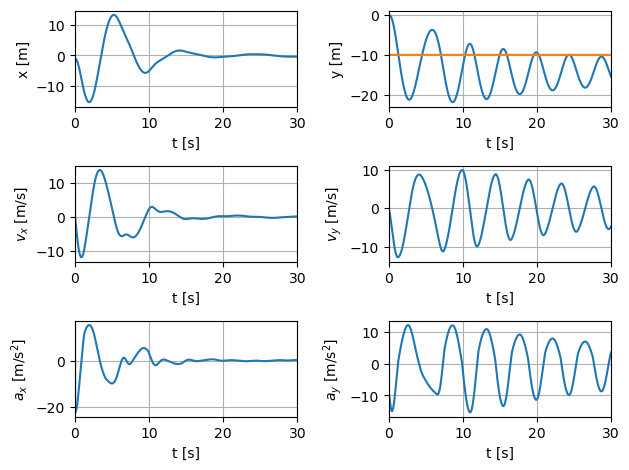

In [26]:
def narysuj_parametry_ruchu(t, x, y, V, A, L):
    fig, ax = plt.subplots(3,2)

    for row in ax:
        for col in row:
            col.grid()
            col.set_xlabel("t [s]")
            col.set_xlim([0,np.max(t)])

    ax[0,0].plot(t,x)
    ax[0,0].set_ylabel("x [m]")

    ax[0,1].plot(t,y)
    ax[0,1].plot(t,-L*np.ones_like(y))
    ax[0,1].set_ylabel("y [m]")

    ax[1,0].plot(t,V[:,0])
    ax[1,0].set_ylabel("$v_x$ [m/s]")

    ax[1,1].plot(t,V[:,1])
    ax[1,1].set_ylabel("$v_y$ [m/s]")

    ax[2,0].plot(t,A[:,0])
    ax[2,0].set_ylabel("$a_x$ [m/s$^2$]")

    ax[2,1].plot(t,A[:,1])
    ax[2,1].set_ylabel("$a_y$ [m/s$^2$]")

    fig.tight_layout()


narysuj_parametry_ruchu(t, x, y, V, A, L)

Na kolejnych wykresach przedstawione będą przebiegi składowych $x$ i $y$ sił sprężystości liny, oporów ruchu oraz siły wypadkowej działającej na skoczka.

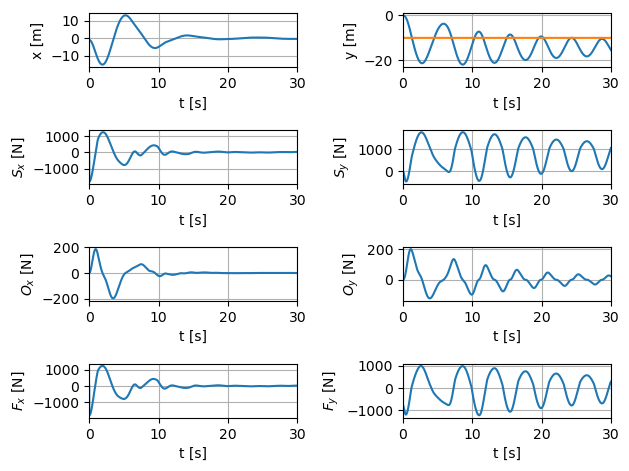

In [27]:
def narysuj_sily(t, x, y, S, O, F, L):
    fig, ax = plt.subplots(4,2)

    for row in ax:
        for col in row:
            col.grid()
            col.set_xlabel("t [s]")
            col.set_xlim([0,np.max(t)])

    ax[0,0].plot(t,x)
    ax[0,0].set_ylabel("x [m]")

    ax[0,1].plot(t,y)
    ax[0,1].plot(t,-L*np.ones_like(y))
    ax[0,1].set_ylabel("y [m]")

    ax[1,0].plot(t,S[:,0])
    ax[1,0].set_ylabel("$S_x$ [N]")

    ax[1,1].plot(t,S[:,1])
    ax[1,1].set_ylabel("$S_y$ [N]")

    ax[2,0].plot(t,O[:,0])
    ax[2,0].set_ylabel("$O_x$ [N]")

    ax[2,1].plot(t,O[:,1])
    ax[2,1].set_ylabel("$O_y$ [N]")

    ax[3,0].plot(t,F[:,0])
    ax[3,0].set_ylabel("$F_x$ [N]")

    ax[3,1].plot(t,F[:,1])
    ax[3,1].set_ylabel("$F_y$ [N]")

    fig.tight_layout()


narysuj_sily(t, x, y, S, O, F, L)

Na koniec narysujemy wykresy przedstawiające przebieg w czasie współrzędnej $y$ skoczka, oraz wartości różnych składowych energii mechanicznej, tj. jego energii potencjalnej (grawitacji) oraz energii potencjalnej sprężystości liny. Dodatkowo, narysujemy również przebieg w czasie wartości całkowitej energii mechanicznej układu skoczek-lina. 

Spróbuj odpowiedzieć na pytanie czy poniższy wykres jest prawidłowy? Jak pogodzić przebieg wykresu z zasadą zachowania energii mechanicznej?

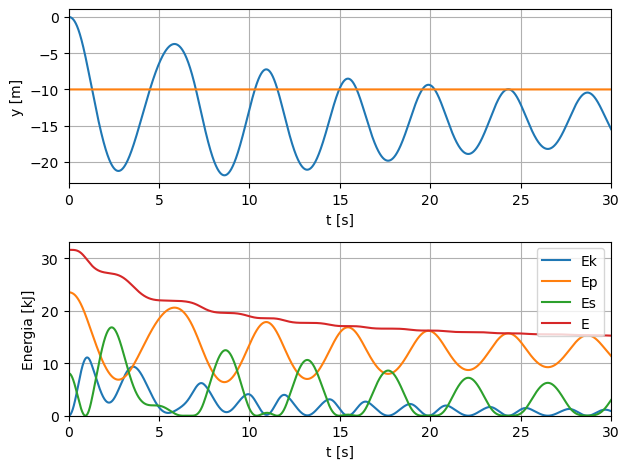

In [28]:
def narysuj_energie(t,x,y,Ek,Ep,Es,E,L):
    fig, ax = plt.subplots(2,1)

    for row in ax:
        row.grid()
        row.set_xlabel("t [s]")
        row.set_xlim([0,np.max(t)])

    ax[0].plot(t,y)
    ax[0].plot(t,-L*np.ones_like(y))
    ax[0].set_ylabel("y [m]")

    ax[1].plot(t,Ek/1e3)
    ax[1].plot(t,Ep/1e3)
    ax[1].plot(t,Es/1e3)
    ax[1].plot(t,E/1e3)
    ax[1].set_ylim(bottom=0)
    ax[1].set_ylabel("Energia [kJ]")
    ax[1].legend(["Ek","Ep","Es","E"], loc="upper right")

    fig.tight_layout()


narysuj_energie(t,x,y,Ek,Ep,Es,E,L)

## DODATEK. Dopuszczalne wartości parametrów

Poniżej znajdują się parametry, które można zmieniać w danych skryptu, aby sprawdzić jak zmienią się wyniki symulacji.

$H \in [20;50] \ \textrm{m}$

$m \in [50;150] \ \textrm{kg}$

$L \in [6;20] \ \textrm{m}$

$x_s \in [0;-L] \ \textrm{m}$

Parametry liny bungee:
* sztywna: $k_1 = 250 \ \textrm{N}/\textrm{m}$, $k_2 = 150 \ \textrm{N}/\textrm{m}$, 
* średnia: $k_1 = 200 \ \textrm{N}/\textrm{m}$, $k_2 = 110 \ \textrm{N}/\textrm{m}$, 
* podatna: $k_1 = 160 \ \textrm{N}/\textrm{m}$, $k_2 = 80 \ \textrm{N}/\textrm{m}$, 
* $e_b \in [4;6] \ \textrm{m}$.

Parametry oporów ruchu:
* $\rho \in [1.1;1.3] \ \dfrac{\textrm{kg}}{\textrm{m}^3}$,
* $C = 0.7$ dla skoku stopami do dołu oraz $C = 1.0$ dla skoku na płasko,
* $A \in [0.65;1.05] \ \textrm{m}^2$, gdzie średnia powiechdnia kobiety to $0.8$, a mężczyzny $0.95$.

Maksymalna siła w linie bungee $S_{max} \approx 20 \ \textrm{kN}$

Wskaźnik wydłużenia do długości początkowej $\dfrac{e}{L} \in [2;4]$